### Evaluating Binary Classifier Predictions

In [2]:
# Load libraries
from sklearn.model_selection import cross_val_score 
from sklearn.linear_model import LogisticRegression 
from sklearn.datasets import make_classification
# Generate features matrix and target vector
X, y = make_classification(n_samples = 10000,
                               n_features = 3,
                               n_informative = 3,
                               n_redundant = 0,
                               n_classes = 2,
                               random_state = 1)
# Create logistic regression
logit = LogisticRegression()
# Cross-validate model using accuracy
cross_val_score(logit, X, y, scoring="accuracy")

array([0.9555, 0.95  , 0.9585, 0.9555, 0.956 ])

In [3]:
# Cross-validate model using precision
cross_val_score(logit, X, y, scoring="precision")

array([0.95963673, 0.94820717, 0.9635996 , 0.96149949, 0.96060606])

In [4]:
# Cross-validate model using recall
cross_val_score(logit, X, y, scoring="recall")

array([0.951, 0.952, 0.953, 0.949, 0.951])

In [5]:
# Cross-validate model using f1
cross_val_score(logit, X, y, scoring="f1")

array([0.95529884, 0.9500998 , 0.95827049, 0.95520886, 0.95577889])

In [6]:
# Load library
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score
# Create training and test split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                        y,
                                                        test_size=0.1,
                                                        random_state=1)
# Predict values for training target vector
y_hat = logit.fit(X_train, y_train).predict(X_test) # Calculate accuracy
accuracy_score(y_test, y_hat)

0.947

### Evaluating Binary Classifier Thresholds

In [7]:
# Load libraries
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification 
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import roc_curve, roc_auc_score 
from sklearn.model_selection import train_test_split
# Create feature matrix and target vector
features, target = make_classification(n_samples=10000,
                                           n_features=10,
                                           n_classes=2,
                                           n_informative=3,
                                           random_state=3)
# Split into training and test sets
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.1, random_state=1)

In [8]:
# Create classifier
logit = LogisticRegression() # Train model
logit.fit(features_train, target_train) # Get predicted probabilities
target_probabilities = logit.predict_proba(features_test)[:,1]
# Create true and false positive rates
false_positive_rate, true_positive_rate, threshold = roc_curve(target_test,
                                                               target_probabilities)

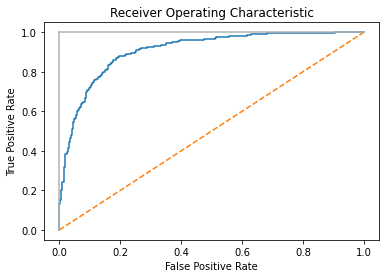

In [9]:
# Plot ROC curve
plt.title("Receiver Operating Characteristic")
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()